In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [2]:
df=pd.read_csv('winequality-white.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

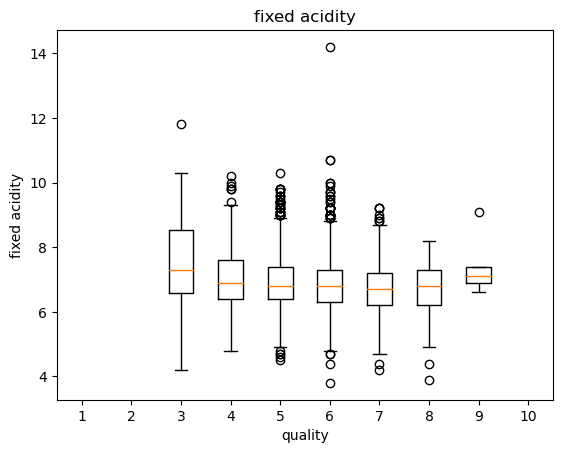

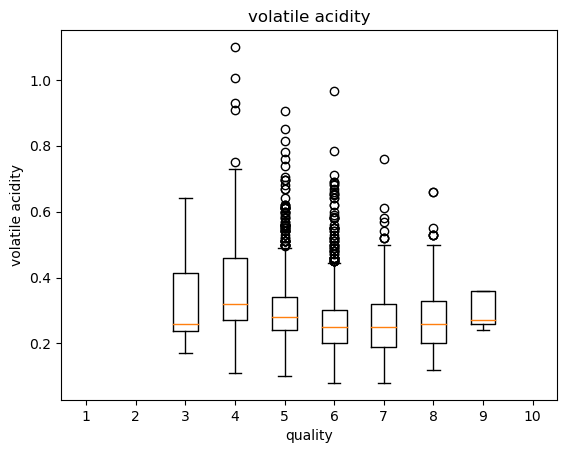

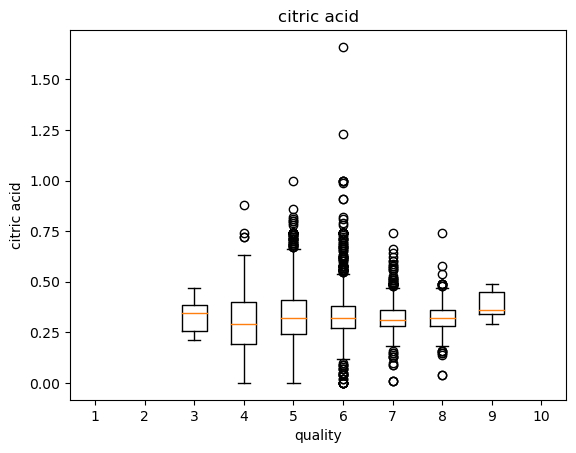

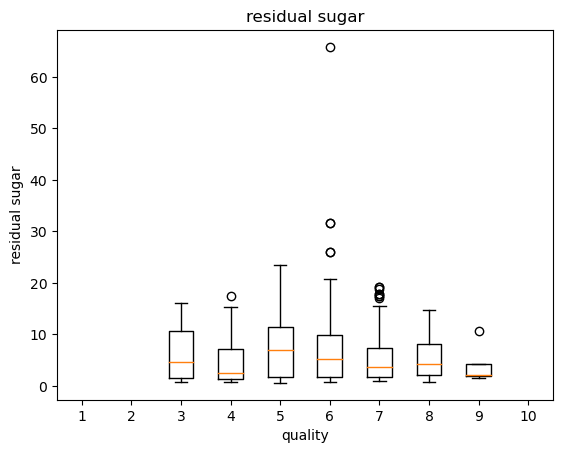

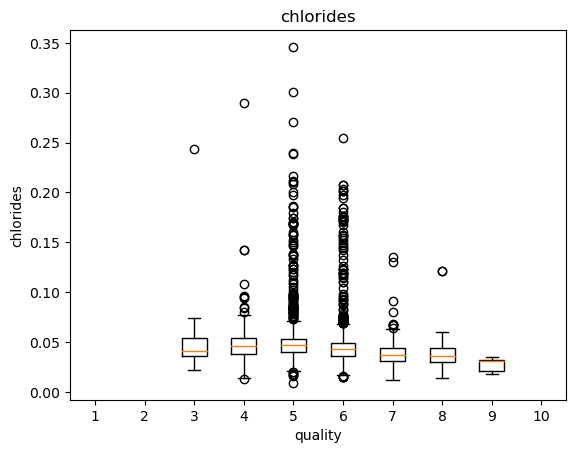

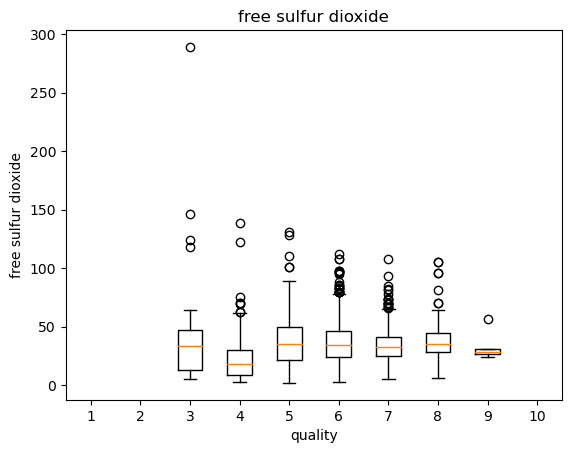

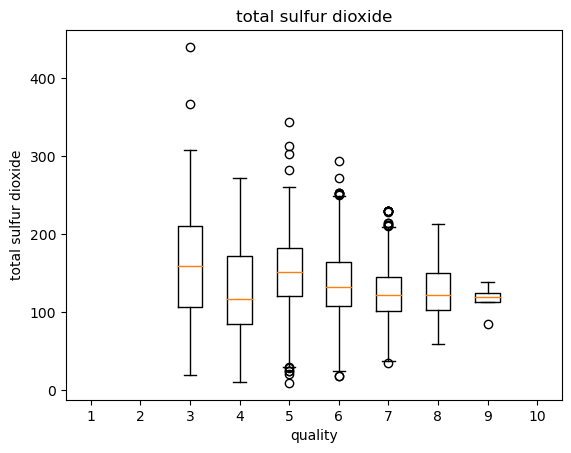

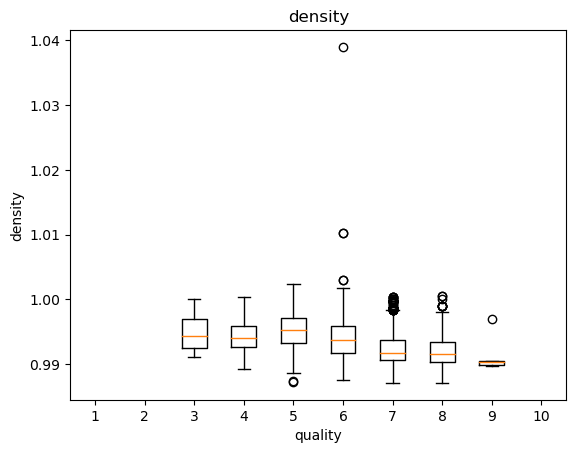

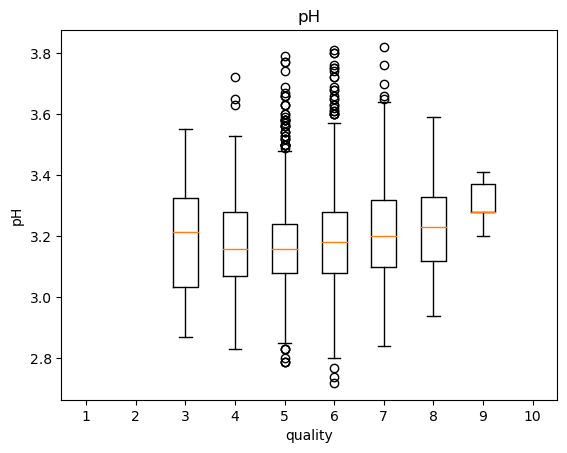

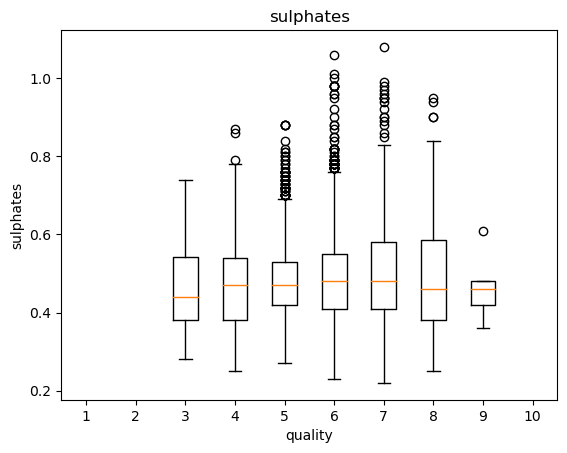

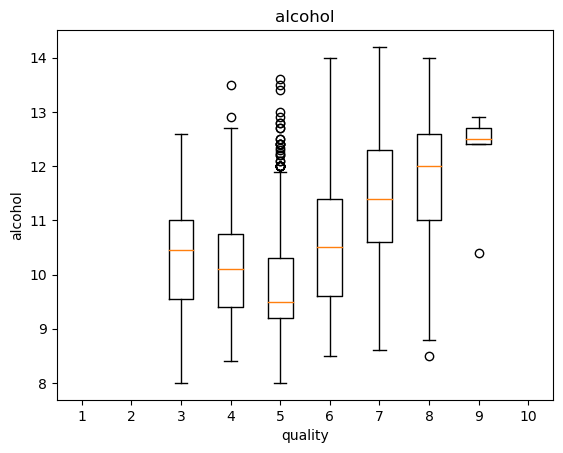

In [7]:
for label in df.columns[:-1]:

    plt.boxplot([df[df['quality']==i][label] for i in range(1, 11)])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()

## Gathering the training and testing data

In [8]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

In [9]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [10]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

K Nearest Neighbors Classifier

In [11]:
n3 = KNeighborsClassifier(n_neighbors = 3)
n3.fit(x_train, y_train)
pred_n3 = n3.predict(x_test)
print(classification_report(y_test, pred_n3))
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       321
           1       0.77      0.79      0.78       624
           2       0.39      0.26      0.31        35

    accuracy                           0.72       980
   macro avg       0.60      0.56      0.57       980
weighted avg       0.71      0.72      0.71       980

0.7292016806722689


In [12]:
n5 = KNeighborsClassifier(n_neighbors = 5)
n5.fit(x_train, y_train)
pred_n5 = n5.predict(x_test)
print(classification_report(y_test, pred_n5))
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.59      0.62       321
           1       0.76      0.82      0.79       624
           2       0.33      0.11      0.17        35

    accuracy                           0.72       980
   macro avg       0.58      0.51      0.52       980
weighted avg       0.71      0.72      0.71       980

0.7225618508272874


Random Forest Classifier

In [14]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       321
           1       0.84      0.90      0.87       624
           2       1.00      0.43      0.60        35

    accuracy                           0.82       980
   macro avg       0.87      0.68      0.74       980
weighted avg       0.83      0.82      0.82       980

0.8037234459000994


Decision Tree Classifier

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))
cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       321
           1       0.81      0.79      0.80       624
           2       0.38      0.43      0.40        35

    accuracy                           0.74       980
   macro avg       0.62      0.64      0.63       980
weighted avg       0.75      0.74      0.75       980

0.7401736781669189
